In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

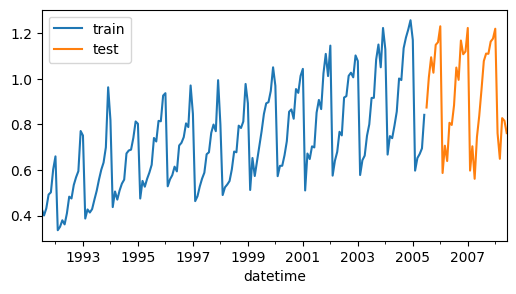

In [3]:
# Download data
# ==============================================================================
url = (
    'https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/'
    'data/h2o.csv'
)
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.legend();

In [4]:
# parameters
lags = [1,2,3,10,11,15]
max_lag = max(lags)
steps = 36
y = data_train
n_splits = len(y) - max_lag - (steps - 1)

In [14]:
y_index = y.index
y_value = y.to_numpy()

In [5]:
X_data = np.full(shape=(n_splits, len(lags)), fill_value=np.nan, dtype=float)
for i, lag in enumerate(lags):
  X_data[:,i] = y[max_lag - lag : -(lag + steps - 1)]
X_data.shape

(118, 6)

In [6]:
y_data = np.full(shape=(n_splits, steps), fill_value=np.nan, dtype=float)
for step in range(steps):
  y_data[:, step] = y[max_lag + step : max_lag + step + n_splits]
y_data.shape

(118, 36)

In [17]:
X_train_col_names = [f"lag_{i}" for i in lags]
X_train = pd.DataFrame(
    data = X_data,
    columns = X_train_col_names,
    index = y_index[max_lag + (steps - 1): ]
)
X_train

,lag_1,lag_2,lag_3,lag_10,lag_11,lag_15
datetime,,,,,,
1995-09-01,0.534761,0.475463,0.483389,0.602652,0.502369,0.429795
1995-10-01,0.568606,0.534761,0.475463,0.660119,0.602652,0.400906
1995-11-01,0.595223,0.568606,0.534761,0.336220,0.660119,0.432159
1995-12-01,0.771258,0.595223,0.568606,0.351348,0.336220,0.492543
1996-01-01,0.751503,0.771258,0.595223,0.379808,0.351348,0.502369
...,...,...,...,...,...,...
2005-02-01,0.575584,1.145868,1.012313,0.704115,0.648470,1.013024
2005-03-01,0.641165,0.575584,1.145868,0.699431,0.704115,1.043805
2005-04-01,0.679862,0.641165,0.575584,0.851926,0.699431,0.510647


In [18]:
y_train_col_names = [f"y_step_{i+1}" for i in range(steps)]
y_train = pd.DataFrame(
    data = y_data,
    index = y_index[max_lag + (steps - 1): ],
    columns = y_train_col_names
)
y_train

,y_step_1,y_step_2,y_step_3,y_step_4,y_step_5,y_step_6,y_step_7,y_step_8,y_step_9,y_step_10,...,y_step_27,y_step_28,y_step_29,y_step_30,y_step_31,y_step_32,y_step_33,y_step_34,y_step_35,y_step_36
datetime,,,,,,,,,,,,,,,,,,,,,
1995-09-01,0.568606,0.595223,0.771258,0.751503,0.387554,0.427283,0.413890,0.428859,0.470126,0.509210,...,0.813308,0.803113,0.475258,0.552572,0.527108,0.561250,0.588978,0.623134,0.740837,0.725372
1995-10-01,0.595223,0.771258,0.751503,0.387554,0.427283,0.413890,0.428859,0.470126,0.509210,0.558443,...,0.803113,0.475258,0.552572,0.527108,0.561250,0.588978,0.623134,0.740837,0.725372,0.815803
1995-11-01,0.771258,0.751503,0.387554,0.427283,0.413890,0.428859,0.470126,0.509210,0.558443,0.601514,...,0.475258,0.552572,0.527108,0.561250,0.588978,0.623134,0.740837,0.725372,0.815803,0.814009
1995-12-01,0.751503,0.387554,0.427283,0.413890,0.428859,0.470126,0.509210,0.558443,0.601514,0.632947,...,0.552572,0.527108,0.561250,0.588978,0.623134,0.740837,0.725372,0.815803,0.814009,0.926653
1996-01-01,0.387554,0.427283,0.413890,0.428859,0.470126,0.509210,0.558443,0.601514,0.632947,0.699605,...,0.527108,0.561250,0.588978,0.623134,0.740837,0.725372,0.815803,0.814009,0.926653,0.937276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-02-01,0.641165,0.679862,0.767938,0.752096,0.918064,0.924368,1.013198,1.026976,1.006796,1.102776,...,0.795129,0.856803,1.001593,0.994864,1.134432,1.181011,1.216037,1.257238,1.170690,0.597639
2005-03-01,0.679862,0.767938,0.752096,0.918064,0.924368,1.013198,1.026976,1.006796,1.102776,1.078145,...,0.856803,1.001593,0.994864,1.134432,1.181011,1.216037,1.257238,1.170690,0.597639,0.652590
2005-04-01,0.767938,0.752096,0.918064,0.924368,1.013198,1.026976,1.006796,1.102776,1.078145,0.578296,...,1.001593,0.994864,1.134432,1.181011,1.216037,1.257238,1.170690,0.597639,0.652590,0.670505
